In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model

from appias import appias
from appias import AppiasDataFrame

In [2]:
data = datasets.load_boston()
_df = AppiasDataFrame(data.data, columns=data.feature_names)
features = [col for col in _df.columns if col != 'LSTAT']

df = AppiasDataFrame()
for feature in features:
    values = np.concatenate((_df[feature].values, [np.inf, np.nan]))
    df[feature] = np.random.choice(values, 1000)
df['LSTAT'] = np.random.choice(_df['LSTAT'].values, 1000)

In [3]:
models = {'enet': linear_model.ElasticNet(),
          'ridge': linear_model.Ridge(),
          'lasso': linear_model.Lasso()
          }

ap = appias(df, response='LSTAT', models=models)

In [4]:
ap.reduce_memory_usage()

Before Reduction: 0.10 MB
After Reduction: 0.05 MB


In [5]:
ap.describe_features()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
len,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
median,0.26363,0,9.69,0,0.538,6.163,80.8,3.2628,5,330,19,391.7
distinct,433,27,72,4,82,387,328,359,10,67,47,315
constant,False,False,False,False,False,False,False,False,False,False,False,False
na,2,3,0,4,2,0,2,4,0,1,3,3
infinite,3,5,2,2,3,2,1,0,2,1,7,1
count,998,997,1000,996,998,1000,998,996,1000,999,997,997
mean,inf,inf,inf,inf,inf,inf,inf,3.78176,inf,inf,inf,inf
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11868,NaN,NaN,NaN,NaN
min,0.00906,0,0.74,0,0.385,3.561,2.9,1.1296,1,187,12.6,0.32


In [4]:
ap.impute_features()
ap.describe_features()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
len,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
median,0.24522,0,8.56,0,0.538,6.189,76.9,3.3389,5,329,18.8,392.265
distinct,446,27,74,3,82,388,313,354,10,64,45,301
constant,False,False,False,False,False,False,False,False,False,False,False,False
na,0,0,0,0,0,0,0,0,0,0,0,0
infinite,0,0,0,0,0,0,0,0,0,0,0,0
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
mean,4.02739,12.2926,10.856,0.0710711,0.55266,6.28957,68.3592,3.83365,9.38338,396.822,18.4789,359.957
std,9.75232,25.056,6.79692,0.256944,0.115938,0.705274,28.3036,2.0948,8.59162,165.083,2.07801,88.3116
min,0.00632,0,0.74,0,0.385,3.863,2.9,1.1296,1,187,13,0.32


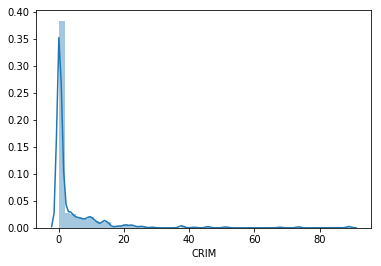

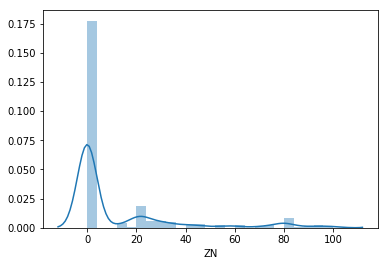

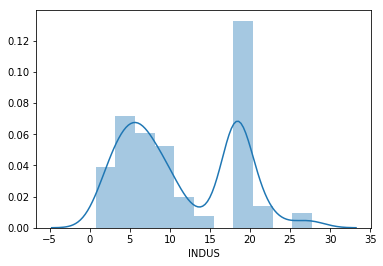

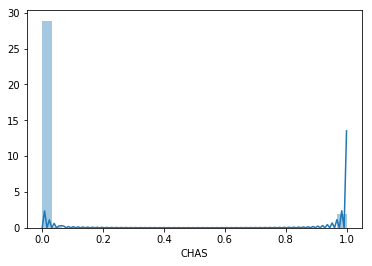

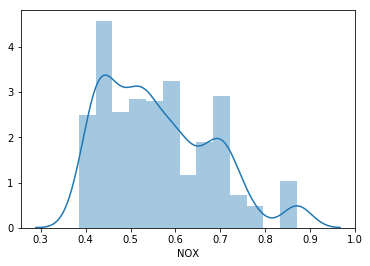

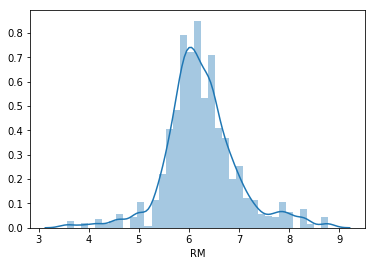

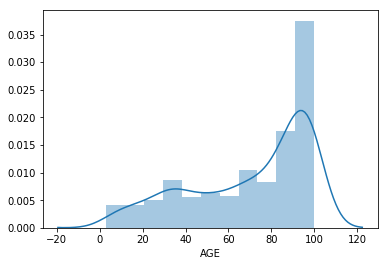

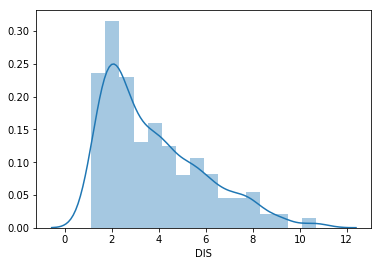

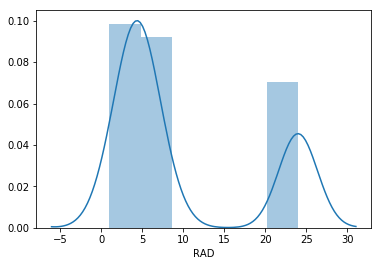

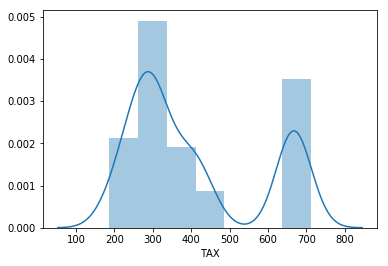

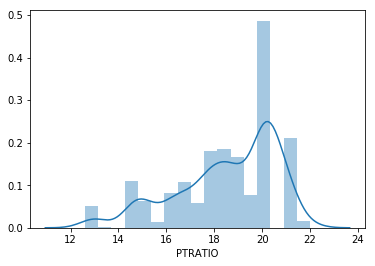

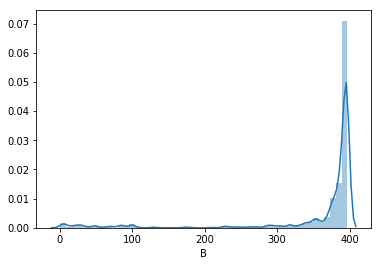

In [7]:
ap.plot_hist_features()

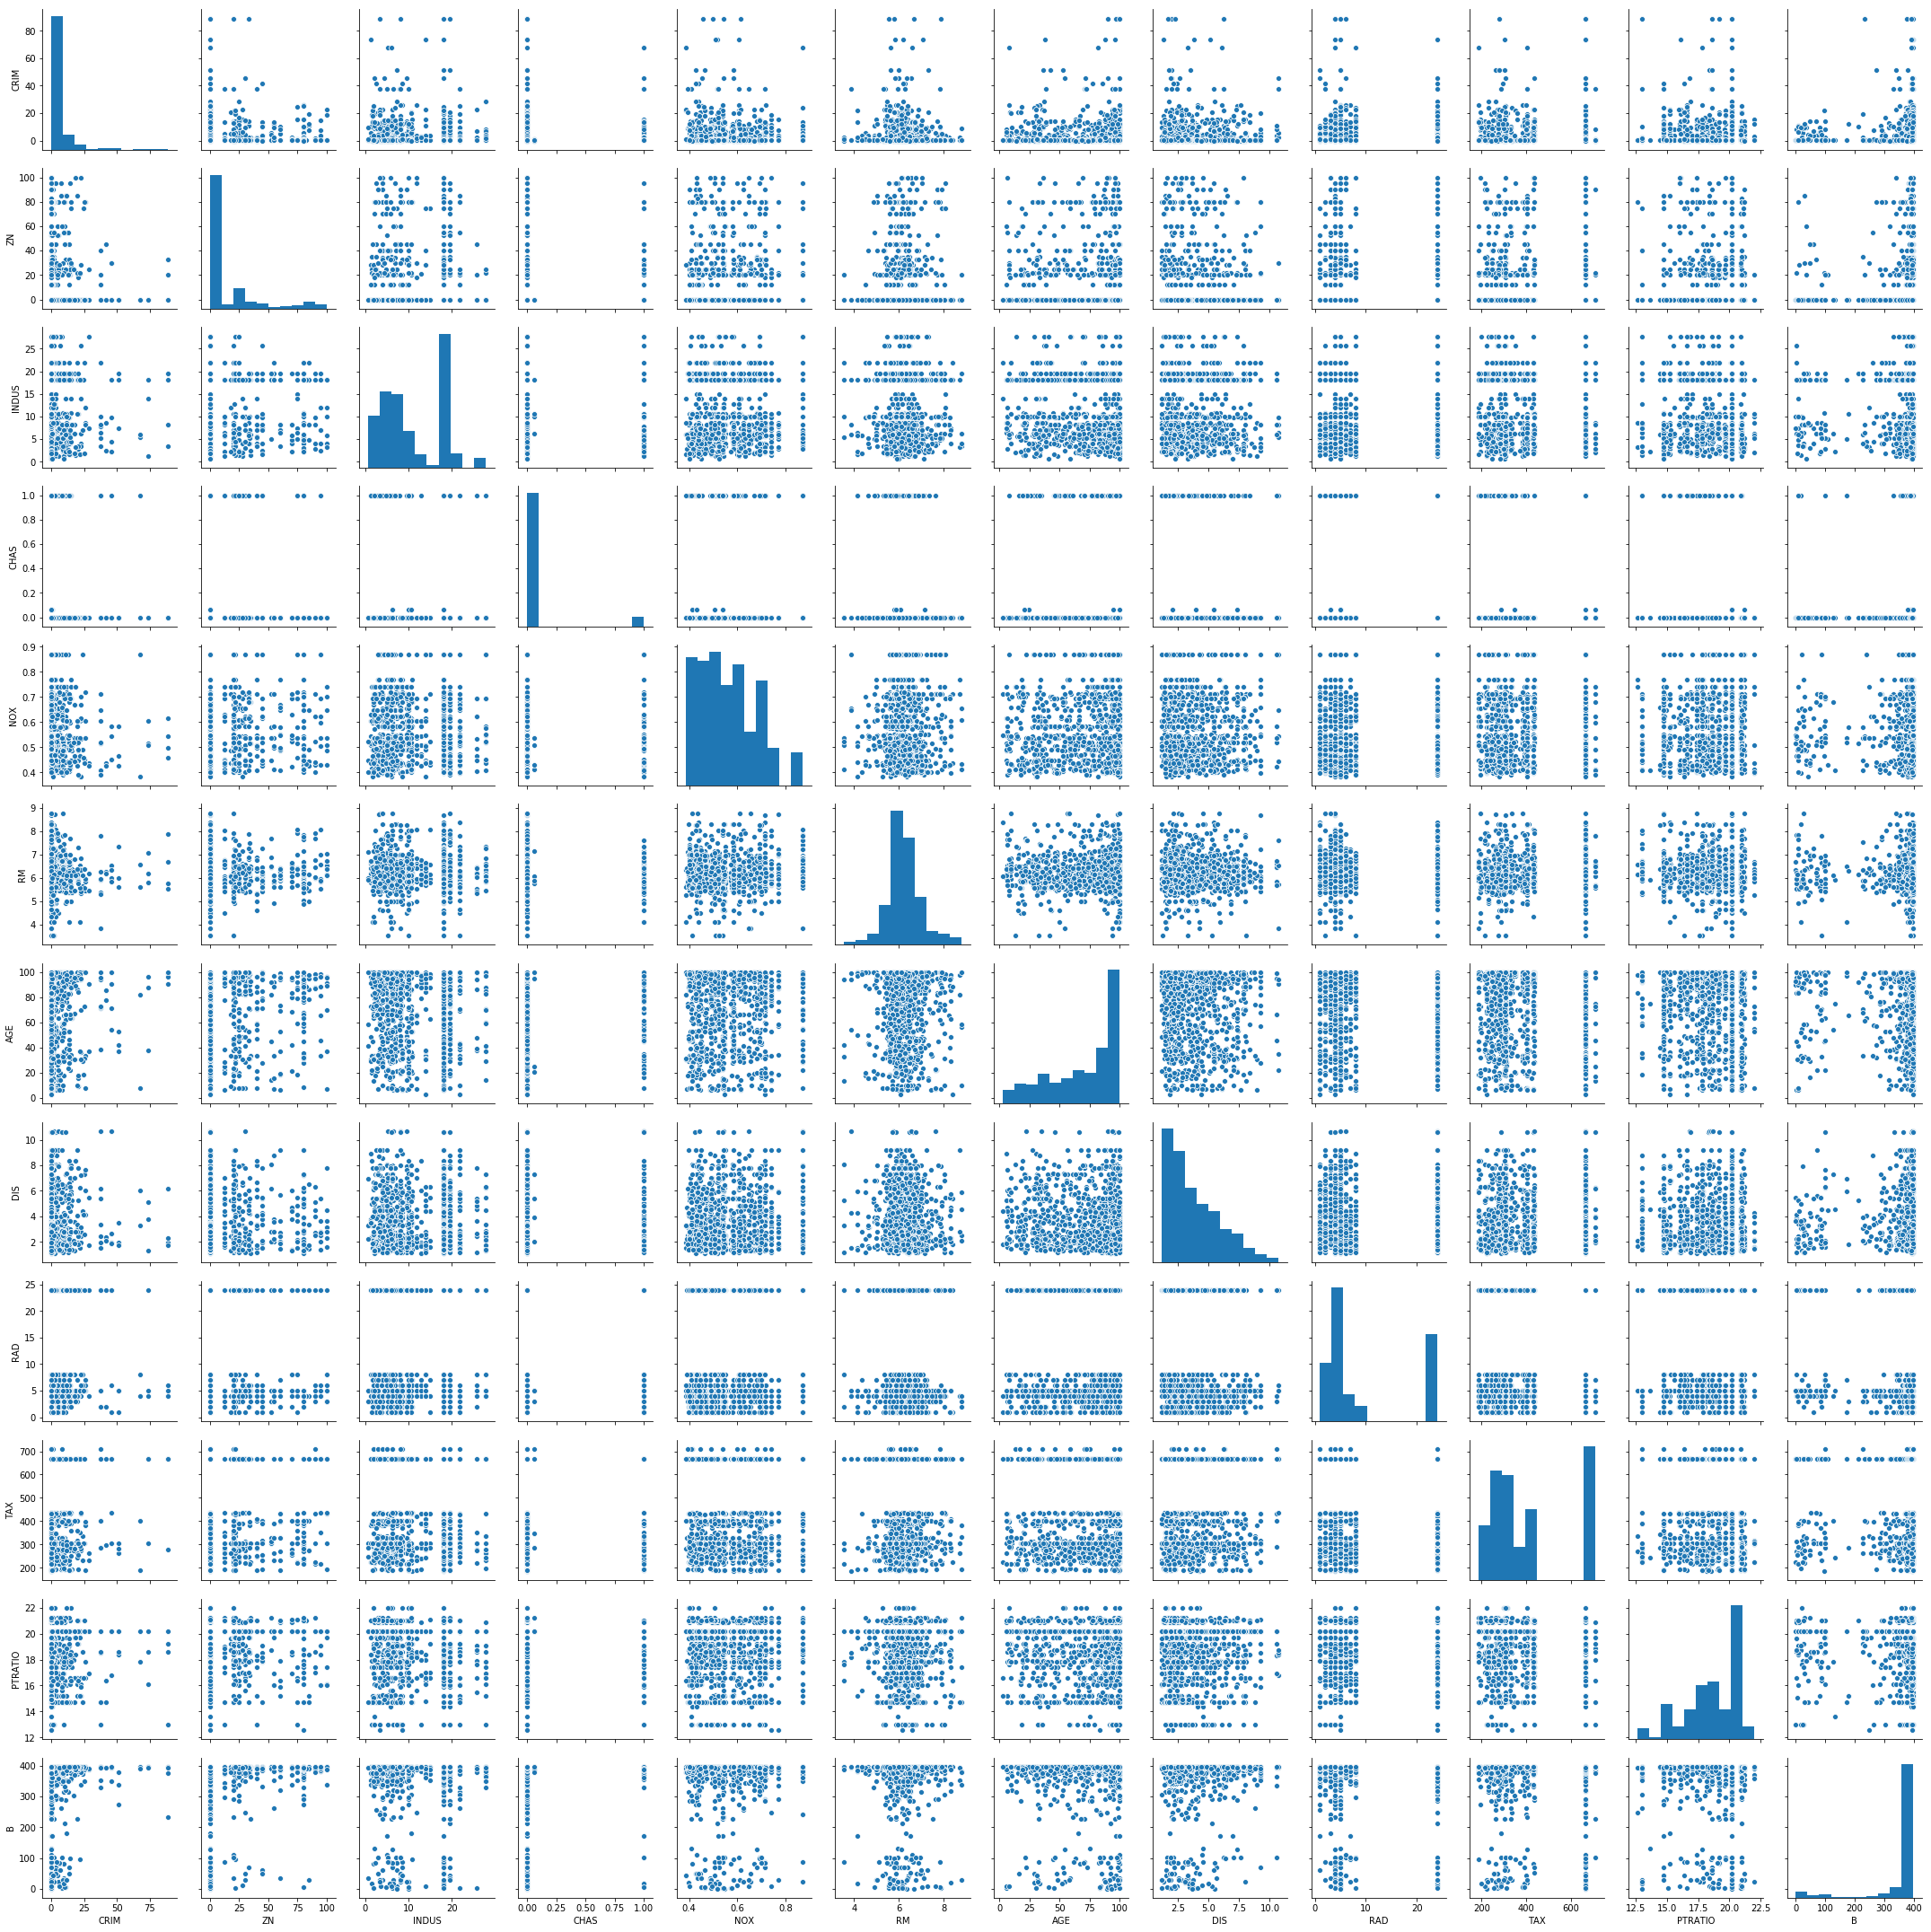

In [8]:
ap.pairplot()

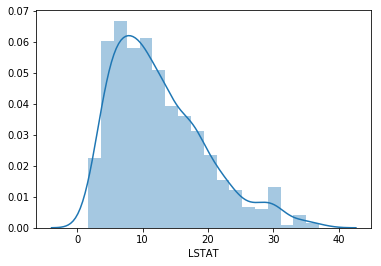

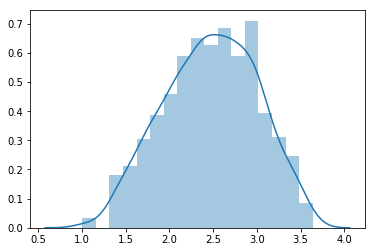

In [5]:
ap.y.plot_hist()

response_transformed = ap.y.transform(kind='log')
transformer = ap.y.transformer
response_transformed.plot_hist()

In [6]:
import pprint

pp = pprint.PrettyPrinter(indent=4)

cvs = ap.cross_validate(transform=True)
cvs_avgs = ap.cross_validate_averages(cvs)

pp.pprint(cvs_avgs)


{   'enet': {   'fit_time': 0.009598016738891602,
                'score_time': 0.002999687194824219,
                'test_neg_mean_squared_error': -50.0158022499375,
                'test_r2': -0.005638275680174232,
                'train_neg_mean_squared_error': -49.9060913815625,
                'train_r2': 0.0},
    'lasso': {   'fit_time': 0.002405261993408203,
                 'score_time': 0.0016005516052246093,
                 'test_neg_mean_squared_error': -50.0158022499375,
                 'test_r2': -0.005638275680174232,
                 'train_neg_mean_squared_error': -49.9060913815625,
                 'train_r2': 0.0},
    'ridge': {   'fit_time': 0.007200956344604492,
                 'score_time': 0.0017998218536376953,
                 'test_neg_mean_squared_error': -51.04125291306845,
                 'test_r2': -0.02608082102430891,
                 'train_neg_mean_squared_error': -49.14891315124823,
                 'train_r2': 0.0152111173016799}}
